In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Research_Paper/SKIN_DISEASE_DATASET/train',
        target_size=(224,224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Research_Paper/SKIN_DISEASE_DATASET/test',
        target_size=(224,224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 672 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#from tensorflow.keras.applications.xception import Xception      
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet201
xcep = DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224, 3)) 

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model1 = models.Sequential()
 
model1.add(xcep)
# Add new layers
model1.add(layers.Flatten())
model1.add(layers.Dense(1024, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(6, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
flatten (Flatten)            (None, 94080)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              96338944  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [ ]:
# NasNetMobile model   
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
# Train the model
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
42/42 [==============================] - 365s 9s/step - loss: 2.5626 - acc: 0.2812 - val_loss: 1.6192 - val_acc: 0.3519
Epoch 2/30
42/42 [==============================] - 26s 616ms/step - loss: 1.6951 - acc: 0.4494 - val_loss: 1.2575 - val_acc: 0.5833
Epoch 3/30
42/42 [==============================] - 26s 609ms/step - loss: 1.4190 - acc: 0.5432 - val_loss: 1.0758 - val_acc: 0.6759
Epoch 4/30
42/42 [==============================] - 26s 609ms/step - loss: 1.2054 - acc: 0.6205 - val_loss: 1.0061 - val_acc: 0.6759
Epoch 5/30
42/42 [==============================] - 25s 604ms/step - loss: 1.0018 - acc: 0.6801 - val_loss: 0.7711 - val_acc: 0.7037
Epoch 6/30
42/42 [==============================] - 26s 615ms/step - loss: 0.8151 - acc: 0.7098 - val_loss: 0.7518 - val_acc: 0.6944
Epoch 7/30
42/42 [==============================] - 26s 612ms/step - loss: 0.7878 - acc: 0.7351 - val_loss: 0.8064 - val_acc: 0.

In [ ]:
from sklearn import metrics
import numpy as np

Y_pred = model1.predict_generator(validation_generator, validation_generator.samples/validation_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
cm = metrics.confusion_matrix(validation_generator.classes, y_pred)

Instructions for updating:
Please use Model.predict, which supports generators.


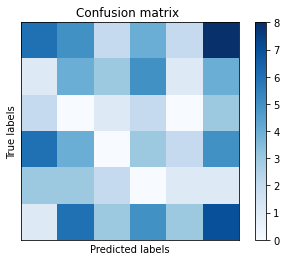

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

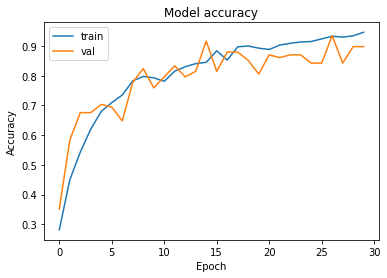

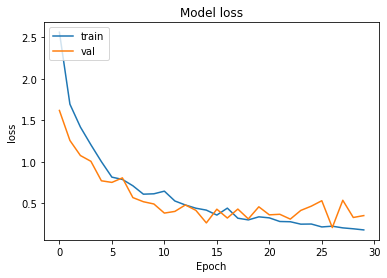

In [ ]:
import matplotlib.pyplot as plt

# training and accuracy value
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model.save('ret_scan.h5')